In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def c(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))
        
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.scatter(df.confirmed,diff.confirmed)
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()

      date  confirmed  deaths  recovered
 2020-3-28       1245       6         97
new  confirmed
     109.0


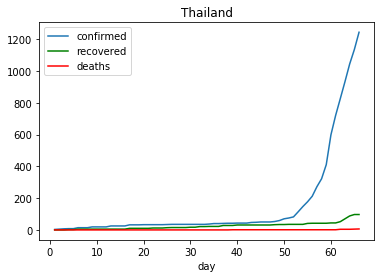

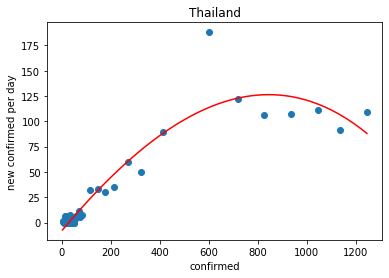

In [3]:
c('Thailand')

      date  confirmed  deaths  recovered
 2020-3-28      81999    3299      75100
new  confirmed
     102.0


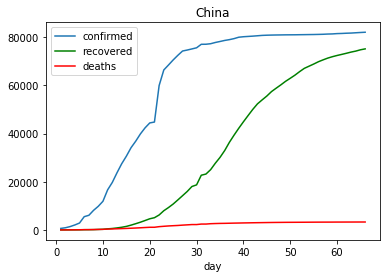

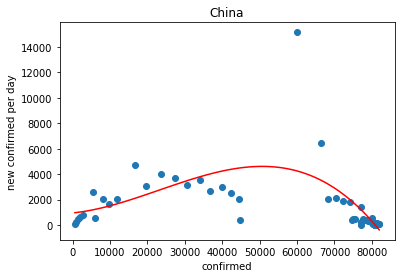

In [4]:
c('China')

      date  confirmed  deaths  recovered
 2020-3-28     121478    2026       1072
new  confirmed
   19821.0


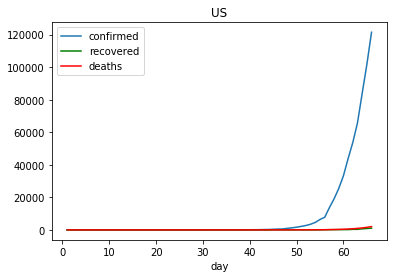

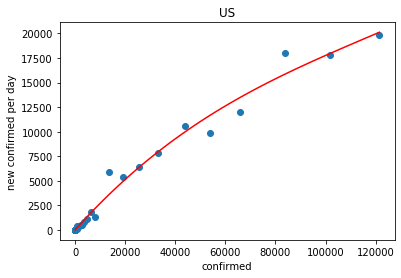

In [5]:
c('US')

      date  confirmed  deaths  recovered
 2020-3-28      92472   10023      12384
new  confirmed
    5974.0


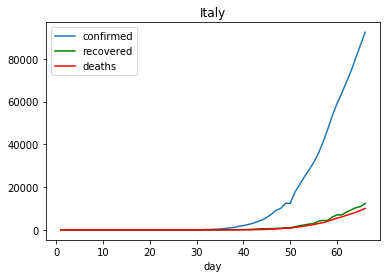

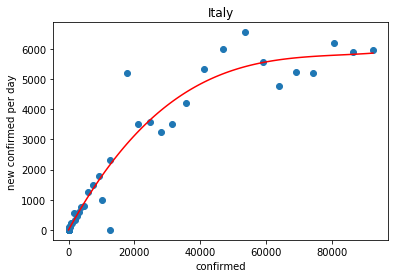

In [6]:
c('Italy')

      date  confirmed  deaths  recovered
 2020-3-28       9478     144       4811
new  confirmed
     146.0


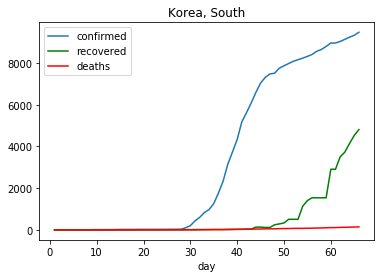

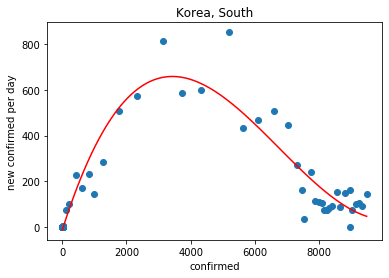

In [7]:
c('Korea, South')